# LENDING CLUB CASE STUDY ANALYSIS

  The Analysis is boradly divided into 4 main parts for readability and understanding purpose.
  
  1. Data Reading & Understanding
  2. Data Cleaning and Data Manipulation
  3. Data Analysis - Both Univaraiate & Bi-Variate Anaysis as part of EDA.
  4. Summary & Recommendations.

## Part-1: Read Data to Python Data Frame & Data Understanding 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100, 'display.max_columns', 130)

In [2]:
#Importing CSV file
df = pd.read_csv('loan.csv',index_col=False,dtype='unicode')
df.shape

(39717, 111)

## Data Understanding and Preparation 

In [3]:
df=df.convert_dtypes()
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,<NA>,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,<NA>,<NA>,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,<NA>,May-16,0,<NA>,1,INDIVIDUAL,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,<NA>,<NA>
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,<NA>,<NA>,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,<NA>,Sep-13,0,<NA>,1,INDIVIDUAL,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,<NA>,<NA>
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,<NA>,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,<NA>,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,<NA>,<NA>,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,<NA>,May-16,0,<NA>,1,INDIVIDUAL,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,<NA>,<NA>,<NA>,<NA>
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,<NA>,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,<NA>,Apr-16,0,<NA>,1,INDIVIDUAL,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: Int64(54), string(57)
memory usage: 35.7 MB


In [5]:
df.nunique()      # unique no. in each column

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

 #### Independent Variables - Some of the important variables in this dataset  are -
loan_amnt (listed amount of the loan applied for by the borrower),
term (number of payments on the loan. Values are in months and can be either 36 or 60 ),
int_rate (Interest Rate on the loan), 
grade (LC assigned loan grade),
sub_grade (LC assigned loan grade),
annual_inc (The self-reported annual income provided by the borrower during registration),
purpose(A category provided by the borrower for the loan request).
  
#### Dependent Variable / Target Variable in the dataset is - 'Loan_Status".
   

The Strategy here is that to figure out the comparison of default rates across various explanatory variables and identify the ones that affect the default rate the most.

### Ignoring Data with loan status as "Current" as they can be either in 'Non-Defaulters' or in 'Defaulters' category


# Part-2 - Data Cleaning and Manipulating the Data

In the entire 111 columns ,some are having large no.of missing values/records. we first fix those first and go for other types of data quality checks.

In [33]:
# summarising number of missing values in each column

df.isnull().sum(axis=1) 

0        2
1        1
2        3
3        0
4        2
5        1
6        1
7        2
8        1
9        1
10       2
11       1
12       1
13       2
14       2
15       1
16       1
17       0
18       2
19       1
20       1
21       1
22       2
23       2
24       2
25       2
26       0
27       1
28       1
29       2
30       1
31       0
32       2
33       1
34       1
35       1
36       1
37       1
38       0
39       2
40       2
41       1
42       0
43       2
44       2
45       2
46       2
47       1
48       1
49       2
        ..
38527    3
38528    3
38529    3
38530    3
38531    4
38532    4
38533    3
38534    4
38535    3
38536    5
38537    3
38538    3
38539    3
38540    2
38541    3
38542    4
38543    3
38544    3
38545    4
38546    5
38547    4
38548    5
38549    4
38550    4
38551    4
38552    4
38553    4
38554    4
38555    4
38556    4
38557    4
38558    4
38559    4
38560    5
38561    4
38562    4
38563    4
38564    5
38565    4
38566    5

@From the above we can observe, by and large , we have clean the dataset by dropping the unnecessary columns and missing values.

@@ Lets also check all the columns are in the same format.

In [43]:
# checking wether some rows have more than 5 missing values ( Mising check -Row WISE

len(df[df.isnull().sum(axis=1) > 5 ].index)

4

#### Missing Columns having more than 90% null values

In [6]:
missing_columns =df.columns[100*(df.isnull().sum()/len(df.index)) > 90].values
print(missing_columns)

['mths_since_last_record' 'next_pymnt_d' 'mths_since_last_major_derog'
 'annual_inc_joint' 'dti_joint' 'verification_status_joint' 'tot_coll_amt'
 'tot_cur_bal' 'open_acc_6m' 'open_il_6m' 'open_il_12m' 'open_il_24m'
 'mths_since_rcnt_il' 'total_bal_il' 'il_util' 'open_rv_12m' 'open_rv_24m'
 'max_bal_bc' 'all_util' 'total_rev_hi_lim' 'inq_fi' 'total_cu_tl'
 'inq_last_12m' 'acc_open_past_24mths' 'avg_cur_bal' 'bc_open_to_buy'
 'bc_util' 'mo_sin_old_il_acct' 'mo_sin_old_rev_tl_op'
 'mo_sin_rcnt_rev_tl_op' 'mo_sin_rcnt_tl' 'mort_acc'
 'mths_since_recent_bc' 'mths_since_recent_bc_dlq' 'mths_since_recent_inq'
 'mths_since_recent_revol_delinq' 'num_accts_ever_120_pd' 'num_actv_bc_tl'
 'num_actv_rev_tl' 'num_bc_sats' 'num_bc_tl' 'num_il_tl' 'num_op_rev_tl'
 'num_rev_accts' 'num_rev_tl_bal_gt_0' 'num_sats' 'num_tl_120dpd_2m'
 'num_tl_30dpd' 'num_tl_90g_dpd_24m' 'num_tl_op_past_12m' 'pct_tl_nvr_dlq'
 'percent_bc_gt_75' 'tot_hi_cred_lim' 'total_bal_ex_mort' 'total_bc_limit'
 'total_il_high_credit

In [7]:
# df[~(df.loc[:,list(missing_columns)].columns.values)]
df[missing_columns]

,mths_since_last_record,next_pymnt_d,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,<NA>,Jun-16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
39713,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
39714,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
39715,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [36]:
pct_null = df.isnull().sum() / len(df)
missing_columns = pct_null[pct_null > 0.90].index
df.drop(missing_columns, axis=1, inplace=True)

print(pct_null)

index                         0.000000
id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     0.061850
emp_length                    0.026778
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
desc                          0.324727
purpose                       0.000000
title                         0.000285
zip_code                      0.000000
addr_state                    0.000000
dti                      

In [8]:
# Removing unnecessary columns which are not required for estimation of defaulters and non-defaulters
df.drop(missing_columns,axis=1,inplace=True)
# Removing unnecessary signs from the column
df['term']=df['term'].apply(lambda x: int(x[:3]))
df['int_rate']=df['int_rate'].apply(lambda x: float(x[:-1]))

In [9]:
# Ignoring Data with loan_status as "Current" since they can be either in 'Non-Defaulters' or in 'Defaulters' category
 
df = pd.DataFrame(df[df['loan_status']!='Current'])
df.reset_index(inplace=True)
df.head()

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0,1077501,1296599,5000,5000,4975,36,10.65,162.87,B,B2,<NA>,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,<NA>,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1,1077430,1314167,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,<NA>,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,2,1077175,1313524,2400,2400,2400,36,15.96,84.33,C,C5,<NA>,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,<NA>,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,<NA>,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,3,1076863,1277178,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,5,1075269,1311441,5000,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,<NA>,wedding,My wedding loan I promise to pay back,852xx,AZ,11.2,0,Nov-04,3,<NA>,9,0,7963,28.30%,12,f,0,0,5632.21,5632.21,5000,632.21,0,0,0,Jan-15,161.03,Jan-16,0,1,INDIVIDUAL,0,0,0,0,0


# Part-3 - Data  Analysis

## Univariate Analysis for Categorical variables


In [28]:
df.shape

(38577, 56)

## Label the Fully Paid as '0'and Default/charged off as '1'

In [37]:
df['loan_status_cat'] = df['loan_status'].apply(lambda x: 0 if x =='Fully Paid' else 1)
df['loan_status_cat']

0        0
1        1
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        0
10       0
11       1
12       0
13       1
14       0
15       0
16       0
17       0
18       0
19       0
20       1
21       0
22       0
23       1
24       0
25       1
26       1
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       1
44       0
45       0
46       0
47       1
48       0
49       0
        ..
38527    1
38528    1
38529    1
38530    0
38531    0
38532    0
38533    0
38534    0
38535    0
38536    0
38537    0
38538    1
38539    0
38540    0
38541    0
38542    0
38543    0
38544    0
38545    0
38546    0
38547    0
38548    1
38549    0
38550    0
38551    0
38552    0
38553    0
38554    0
38555    0
38556    0
38557    0
38558    0
38559    0
38560    0
38561    0
38562    0
38563    0
38564    0
38565    0
38566    0

# Over All Default Rate 



In [40]:
round(np.mean(df['loan_status_cat']),2)

0.15

Verificataion_status vs loan_status

In [45]:
df[['loan_status','verification_status']].describe()

,loan_status,verification_status
count,38577,38577
unique,2,3
top,Fully Paid,Not Verified
freq,32950,16694


In [46]:

df['verification_status'].value_counts().index

Index(['Not Verified', 'Verified', 'Source Verified'], dtype='object')

Percentage of each type in 


Not Verified       5.552531
Verified           5.316639
Source Verified    3.717241
Name: verification_status, dtype: float64

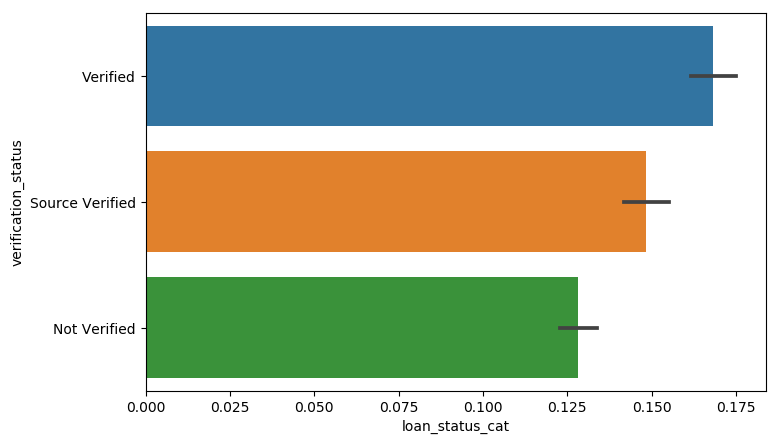

In [55]:
# plt.figure(figsize=(14,16), dpi= 80)
plt.figure(figsize=(8,5),dpi=100)

sns.barplot(x = 'loan_status_cat' ,y ='verification_status',data = df)
print("Percentage of each type in ")
(df[df['loan_status'] == 'Charged Off']['verification_status'].value_counts()/df['verification_status'].count() * 100)

## Result:
1. Even though loans are approved after verification, it seems that default rate is higher than 'Non-verified' category, which is unexpected.

# Grade vs Loan Status

### Affect of grade on loan status

In [49]:
df['grade'].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

In [50]:
# Comparision function for two columns from same dataframe in each value type
def compare(col1,col2):
    color_bold="\033[1m"
    color_end="\033[0m"
    print(color_bold + "Percentages of value of each type in each category for column "+ str(col1).upper() + color_end)
    for i in df[col2].value_counts().index:
        print("For "+ color_bold + i + color_end)
        temp = dict(round(df[df[col2]==i][col1].value_counts()/len(df[df[col2]==i][col1])*100,2))
        for key in temp:
            print(color_bold + key +":" + color_end + "\t"+ str(temp[key]) + "%")
    return

Percentages of value of each type in each category for column GRADE
For Fully Paid
B:	31.11%
A:	28.66%
C:	19.69%
D:	12.04%
E:	5.91%
F:	1.99%
G:	0.6%
For Charged Off
B:	25.32%
C:	23.94%
D:	19.87%
E:	12.71%
A:	10.7%
F:	5.67%
G:	1.79%


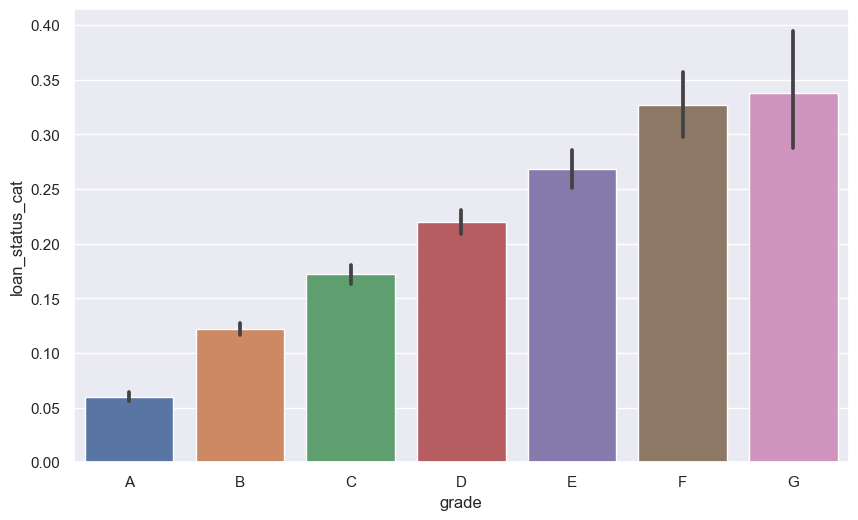

In [15]:
plt.figure(figsize=(10,6),dpi=100)
sns.barplot(x ='grade', y ='loan_status_cat',data = df, order = ['A','B','C','D','E','F','G'])
compare('grade','loan_status')

### Result:
1. In the dataset, as the grade increases from A -> G, default rate is also increased.


# Sub-Grade vs Loan Status

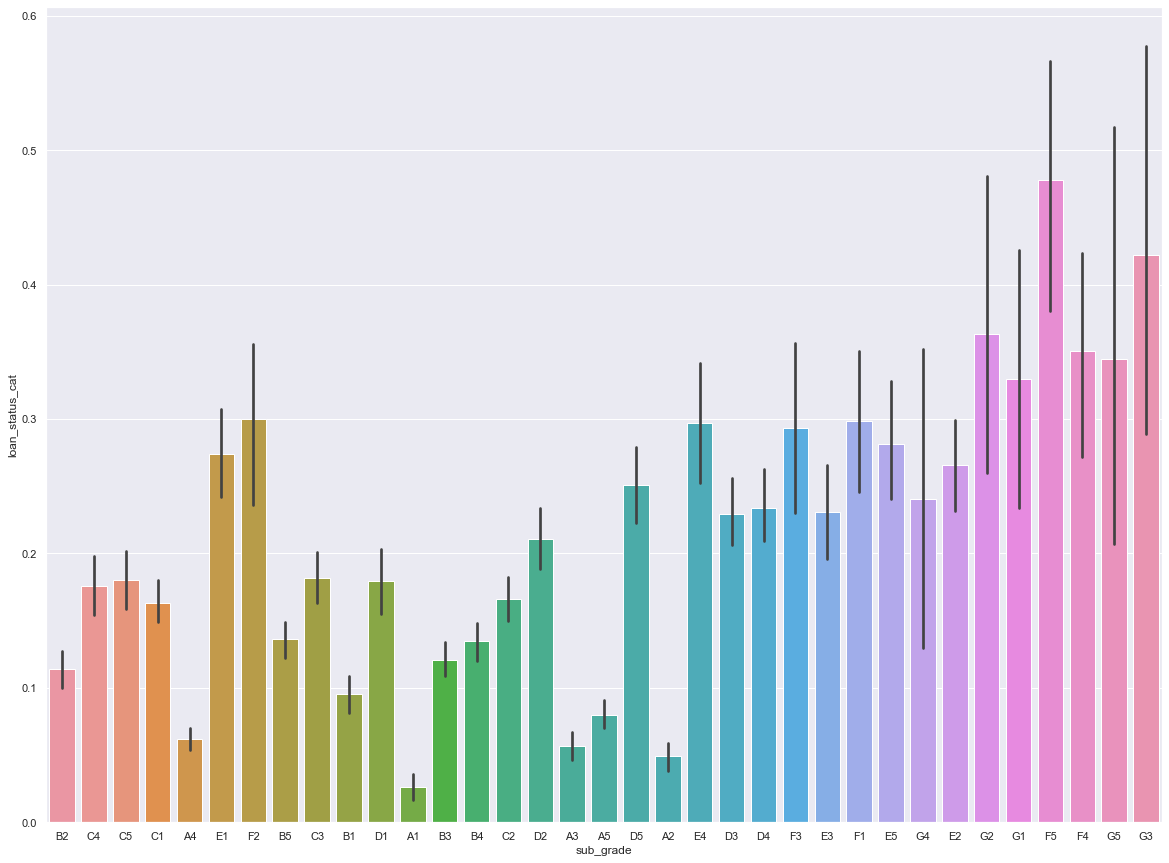

In [16]:
plt.figure(figsize=(20,15))
sns.barplot(x = 'sub_grade',y ='loan_status_cat',data = df)
plt.show() 

### Result:

1. It is evident from the data that A1 is better than A2 and so on.

# Home Ownership vs Loan Status

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status_cat'>

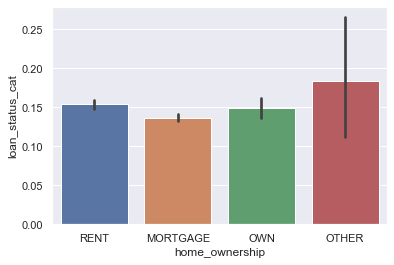

In [17]:
addr_state_charged_off_val = df[df['loan_status'] == 'Charged Off']
sns.barplot(x='home_ownership', y='loan_status_cat', data=df,order = df[df['loan_status'] == 'Charged Off']['home_ownership'].value_counts().index)

### Result:
1. The 'Other' category shows the highest number of defaulters in the given data followed by 'Rent' category.
2. We cannot determine that the borrower who is owning the home is less likely to default.


# Loan Purpose vs Defaulter Applicants

<AxesSubplot:xlabel='loan_status_cat', ylabel='purpose'>

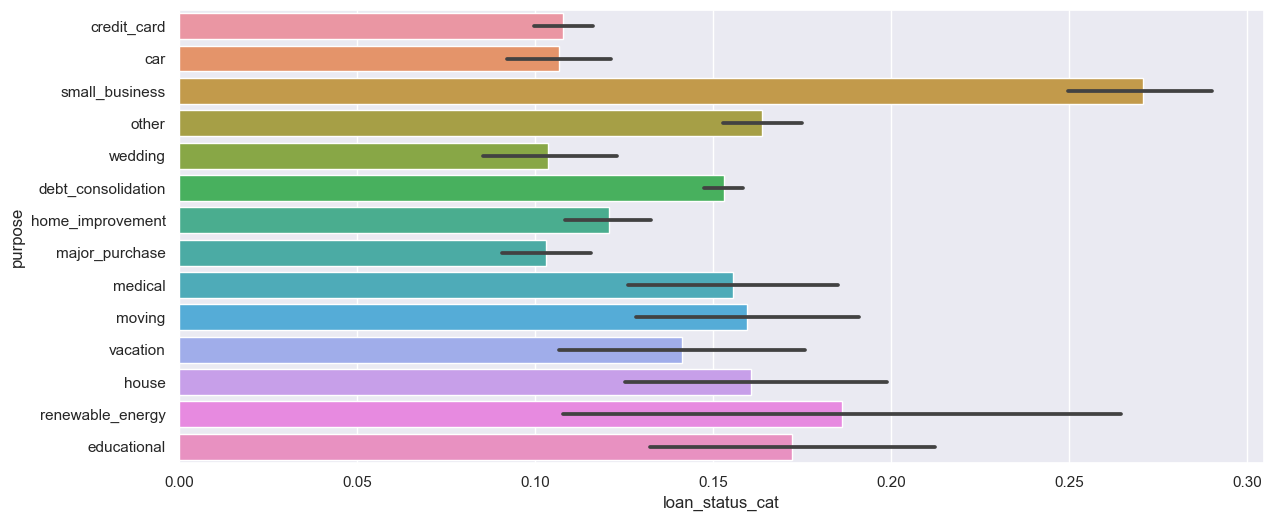

In [18]:
plt.figure(figsize=(14,6),dpi=100)
sns.barplot(x='loan_status_cat', y='purpose', data=df)


### Result:
1. Most of the defaulter applicants give the loan application purpose as "Small Business" followed by 'Renewable Energy'.

## Emp_length vs Loan Status

In [19]:
# Lets Extract the numeric part from the emp_length variable
import re

# at first, lets drop the missing values from it to avoid errors in the below regex step
df =df[~df['emp_length'].isnull()]

# using regular expression to extract numeric values from string
df['emp_length'].apply(lambda X: int(re.findall('\d+',str(X))[0]))

0        10
1         1
2        10
3        10
4         3
         ..
38572     4
38573     3
38574     1
38575     1
38576     1
Name: emp_length, Length: 37544, dtype: int64

<AxesSubplot:xlabel='emp_length', ylabel='loan_status_cat'>

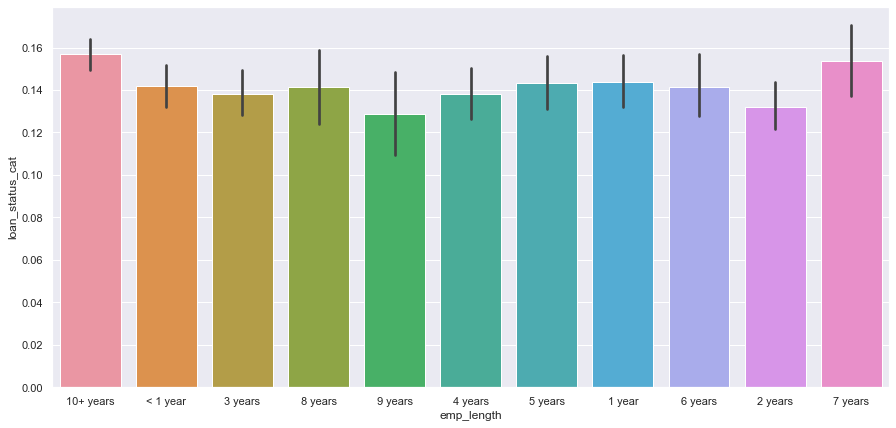

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x='emp_length',data=df,y="loan_status_cat")

## Result:
1. Employability of the applicant is not going to affect the default rate by and large.

# Univaraite anlaysi on Continuos Variables

## Loan Amount vs Loan Status

In [21]:
 # binning loan amount 
def loan_amount(n):
    n = int(n)
    if(n<=5000):
        return 'Low'
    elif(n<=10000 and n>5000):
        return 'Medium'
    elif n> 10000 and n <= 15000:
        return 'high'
    else:
        return 'very high'
df['loan_amnt_cat'] = df['loan_amnt'].apply(loan_amount)

<AxesSubplot:xlabel='loan_amnt_cat', ylabel='loan_status_cat'>

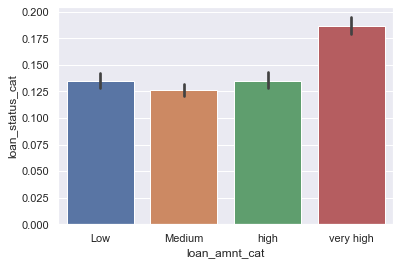

In [22]:
# plt.figure(figsize=(15,10))
sns.barplot(x='loan_amnt_cat',y='loan_status_cat',data=df)

## Result:
1. Higher the loan amount, higher the probability of the loan default rate.
2. Significantly it is very important variable to consider while approving the loans.
    

# Loan Interest vs Loan Status

In [23]:
# Binnig Interest Rate
def loan_interest(n):
    n = int(n)
    if(n<=10):
        return 'Low'
    elif(n<15 and n>10):
        return 'Medium'
    else:
        return 'High'
df['int_rate_cat'] = df['int_rate'].apply(loan_interest)

In [24]:
df['int_rate_cat']

0           Low
1          High
2          High
3        Medium
4           Low
          ...  
38572       Low
38573       Low
38574       Low
38575       Low
38576    Medium
Name: int_rate_cat, Length: 37544, dtype: object

<AxesSubplot:xlabel='int_rate_cat', ylabel='loan_status_cat'>

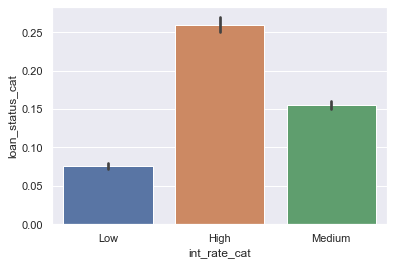

In [25]:
# plt.figure(figsize=(15,10))
sns.barplot(x='int_rate_cat',y='loan_status_cat', data=df)

## Result:
1. The provided dataset reveals that higher the interest rate, higher the default rate.
2. It is clear that low interest rate is one of the drivers in reducing the default rate.
    

# Bivariate Analysis

## Comparing Loan Status vs Term, Purpose

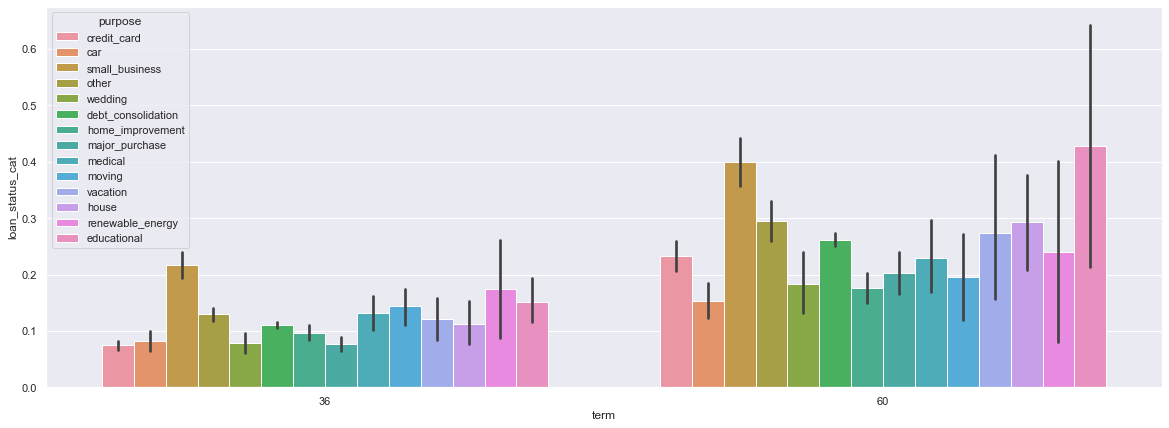

In [26]:
def plot_segmented(cat_var):
    plt.figure(figsize=(20,7))
    sns.barplot(x=cat_var, y='loan_status_cat', hue='purpose', data=df)
    plt.show()
    return
plot_segmented('term')

## Result:

1. 'Educational' loans default rate are highest and 'Car' loans are lowest for 60 months term.
2. 'Small business' loans have the next highest default rate in 60 months tenure.
3. For 36 months term, 'Small Business' loans have highest default rate and 'Credit Card' loans are the lowest.

## Deriving the Debt to Income ratio(dit)

In [27]:
def dti(n):
    n = float(n)
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
df['dti'] = df['dti'].apply(dti)

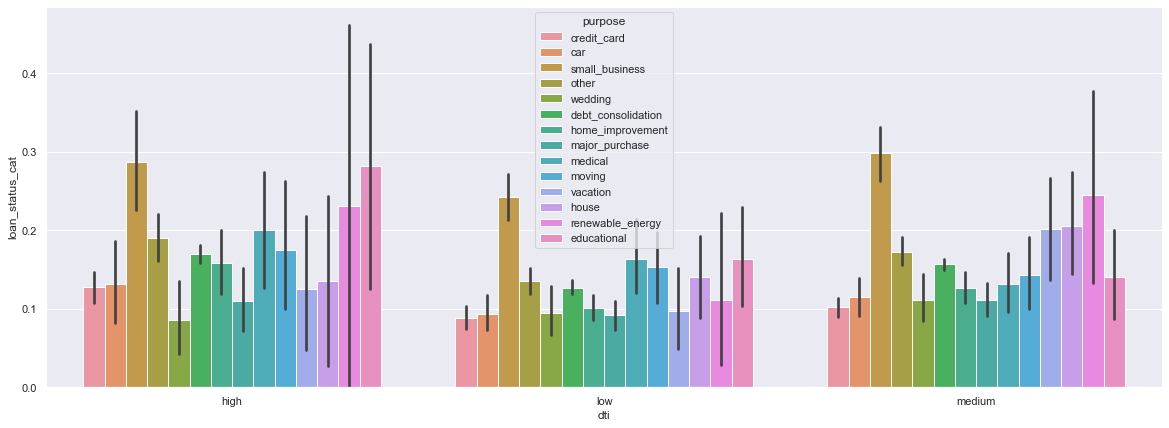

In [28]:
plot_segmented('dti')

## Result:
1. As per the debt to income ratio(dti), 'Medium' category is prone to much default rate.

# Part 4: Summary and Recommendations

##### In order to identify the patterns, for the more likely defaulters from the lenders club data we have carried out univariate analysis for checking the default rate, across various categorical variables.
Further, we performed binning and completed univariate analysis for continous variables as well.

##### To understand the behavior of the default variable, bivariate analysis has been done and identified the key insights.

##### Lastly, debt to income ratio analysis is carried out by classifying 'low', 'medium' and 'high' categories.
For all the analysis, seperate plots has been derived.

#### Recommended drivers for the default rate are:
1. Higher the interest rate, higher the default rate. Hence, interest rate is one of main drivers for defaulter applications.
2. Higher the loan amount, higher the probability of the loan default rate. Therefore, loan amount is important indicator for defaulter applicants.
3. As the grade increases from A -> G, default rate is also increased. Grades are comsidered to be great driver for defaulters assessment.
4. 'Educational' loans default rate are highest and 'Car' loans are lowest for 60 months term.
5. 'Small business' loans have the next highest default rate in 60 months tenure.
6. For 36 months term, 'Small Business' loans have highest default rate and 'Credit Card' loans are the lowest.